In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np
import os
import sklearn
from mpl_render import RenderingImShow 
import mpl_render
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from visbrain.objects import ConnectObj, SceneObj, SourceObj, BrainObj
from visbrain.io import download_file
from mne.viz import plot_connectivity_circle
from matplotlib import cm
sns.set(rc={'figure.figsize':(22,22)})

In [24]:
def plot_connectivity_brain(indep_vars, measure='representational_connectivity', save=False):
    
    #create scene obj
    sc = SceneObj(size=(1500, 600), bgcolor='white')
    # Nodes
    hcp180_lh_nodes = pd.read_csv('/external/rprshnas01/kcni/mabdelhack/uk_biobank/tfmri/imaging/freesurfer_label_info/hcp180/lh_vertex_means_pre.csv', index_col=0)
    hcp180_lh_nodes = hcp180_lh_nodes.values[1:, :]
    
    for idx, var in enumerate(indep_vars):
        p_values = np.load('{}_{}_p_values.npy'.format(measure, var))
        b_values = np.load('{}_{}_b_values.npy'.format(measure, var))
        
        ## # Define the connectivity and source objects
        c_cuscol = ConnectObj('default', hcp180_lh_nodes, b_values, select=p_values <= 0.05/5, 
                              color_by='strength', cmap='coolwarm', clim=[-.01,.01], alpha=0.2)
        s_obj_cu = SourceObj('sources', hcp180_lh_nodes, color='black', radius_min=2.,
                             symbol='ring', alpha=0.2)
        # Add objects to the scene
        sc.add_to_subplot(BrainObj('inflated_pre', translucent=True, hemisphere='left'), row=0, col=idx, 
                          rotate='left')

        # sc.add_to_subplot(BrainObj('inflated_pre', translucent=True, hemisphere='left'), row=0, col=2, rotate='left')
        # sc.add_to_subplot(BrainObj('inflated_pre', translucent=True, hemisphere='left'), row=0, col=2, rotate='left')
        # sc.add_to_subplot(BrainObj('inflated_pre', translucent=True, hemisphere='left'), row=0, col=2, rotate='left')
        # sc.add_to_subplot(BrainObj('inflated_pre', translucent=True, hemisphere='left'), row=0, col=2, rotate='left')
        sc.add_to_subplot(c_cuscol, row=0, col=idx)
        sc.add_to_subplot(s_obj_cu, row=0, col=idx)

        # Finally, display the scene
    
    ar = sc.render()
    # unfortunately the image gets flipped in this process and needs to get flipped back
    ar = np.flip(ar, axis = 0)
    print(ar.shape)
    fig, ax = plt.subplots(1, 1) 
    p = RenderingImShow( ax, size = (1500, 600), extent = (-5, 0, 0, 2), 
                        render_callback = (lambda size, extent: ar))

    # here I delete axis and colorbar, which somehow get added while applying mpl_render
    plt.axis('off') 
    plt.delaxes(fig.axes[1])

    # save the figure in high resolution now possible
    fig.savefig("./results/allvars_brain_connect_{}_230217.png".format(measure), dpi=600) 

#         sc.render()
#         a = sc.screenshot('./results/{}_brain_connect_rdsa_230217.eps', print_size=(5, 5), dpi=300, transparent=True) 
#     #     sc.preview()


In [14]:
independent_vars = ['duration_of_longest_sleep_bout', 
                        'Sleeplessness___insomnia', 
                        'Number_of_symbol_digit_matches_made_correctly', 
                        'phq2',
                       'Daytime_dozing___sleeping_narcolepsy']
plot_connectivity_brain(independent_vars, measure='representational_connectivity')
# print(p)

Creation of a scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    0 connectivity links displayed


0.005303528801148991


ValueError: zero-size array to reduction operation minimum which has no identity

Creation of a scene
ConnectObj(name='default') created
    180 nodes detected
    strength coloring method for connectivity
    1178 connectivity links displayed
SourceObj(name='sources') created
    180 sources detected
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/vispy/visuals/markers.py:564: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ('a_edgewidth', np.float32, 1)])
BrainObj(name='inflated_pre') created
/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/vispy/gloo/buffer.py:454: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  data = data.view(dtype=[('f0', data.dtype.base, c)])
    BrainObj(name='inflated_pre') added to the scene
    ConnectObj(name='default') added to the scene
    SourceObj(name='source

(600, 1500, 4)


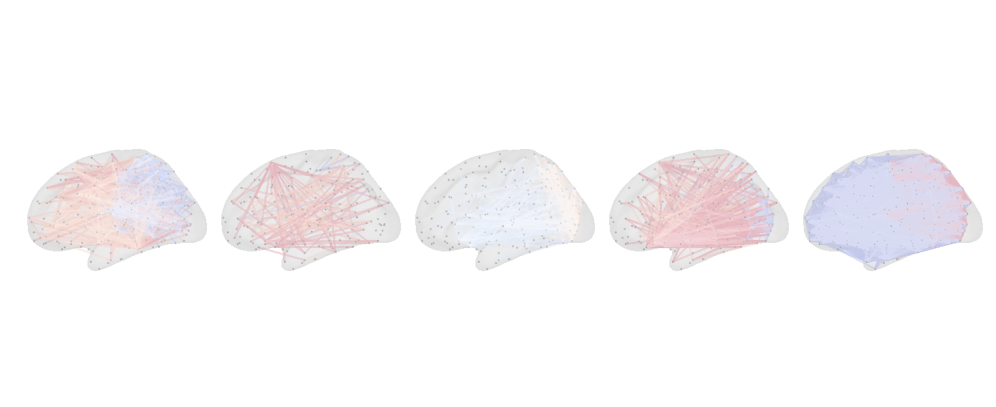

In [25]:
plot_connectivity_brain(independent_vars, measure='seed_based_correlation')

